<a href="https://colab.research.google.com/github/BrianKipngeno/hypothyroidism-test/blob/main/hypothyroidism_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Prediction in Patients

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

## 1. Defining the Question

### a) Specifying the Question



1.  Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.







### b) Defining the Metric for Success

My analysis will be considered a success if it achieves an accuracy of 95%.


### c) Understanding the context


Hypothyroidsm is a medical condition in which an individual's thyroid gland does not produce enough thyroid hormone. This deficiency in thyroid hormone can disrupt crucial body functions such as body tempreture, heart rate and metabolism. Some of the general symptoms of hypothyroidsm include fatigue, muscle weakness, thinning hair, enlarged thyroid gland among others. The risks posed by a hypothyroid condition can be extreme when left untreated over a long period of time. Therefore, it is imperative that an accurate diagnosis is made as early as possible and treatment is administered appropriately.


 Hyperthyroidism (overactive thyroid) occurs when your thyroid gland produces too much of the hormone thyroxine. Hyperthyroidism can accelerate your body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat. Several treatments are available for hyperthyroidism.


This research aims to use robust machine learning algorithms to develop a prediction model that can identify whether or not a patient has a hypothyroid condition based on their symptoms. The model will be trained on thyroid patients' data that was collected by Nairobi Hospital. 



### d) Recording the Experimental Design




1.   Import Libraries
2.   Load the Dataset
3.   Data Cleaning
4.   EDA
5.   Modelling
6.   Evaluation of the Models



## 2. Reading the Data

In [34]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

import warnings
warnings.filterwarnings('ignore')

In [35]:
#loading and previewing the data
hypo = pd.read_csv('/content/hypothyroid.csv')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## 3. Checking the Data

In [36]:
#displaying the first few columns
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


The column TBG has '?' value which will be dealt with during data cleaning.

In [37]:
#Dispalying the last 5 columns
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [38]:
#checking the shape.
hypo.shape

(3163, 26)

the dataset has 3163 rows and 26 columns.

In [39]:
#displaying the general information.
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

all varibles are in string which needs to be corrected.

## 5. Tidying the Dataset

In [40]:
# Check for null
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

there are no null values in our dataset.

In [41]:
for i in hypo.columns:
  if hypo[i].dtype == 'object':
    print(hypo[i].value_counts())
    print('************************************')


negative       3012
hypothyroid     151
Name: status, dtype: int64
************************************
?     446
59     64
60     64
62     63
28     60
72     59
58     59
70     59
41     55
64     54
57     53
34     53
73     52
55     51
63     48
68     48
27     47
65     47
54     46
50     45
38     45
71     45
24     44
56     44
53     44
61     42
32     42
74     41
30     41
78     40
66     39
52     39
33     39
43     38
35     38
77     38
46     38
40     38
67     37
69     37
76     37
36     37
29     34
26     33
75     33
51     33
47     32
39     29
48     29
45     29
37     29
49     28
31     28
20     27
79     27
22     26
80     26
42     26
44     25
18     23
85     23
84     22
21     22
23     22
19     21
25     21
17     18
15     18
16     17
82     14
83     11
87     11
86     10
14      8
81      7
13      7
12      6
88      4
89      4
1       4
11      4
10      2
9       2
92      2
6       2
97      1
98      1
90      1
5       1
8     

In [42]:
#we shall replace the ? with NaN so that it can be converted to  null values

In [43]:
# Drop TBG because it has alot of ? values 
#hypo.drop('TBG', 1, inplace=True)

In [44]:
# Considered ? as null 
#we shall replace the ? with NaN so that it can be converted to  null values
for i in hypo[['age','TSH','T3','TT4','T4U','FTI']]:
    hypo.drop(hypo[hypo[i] == '?'].index, inplace=True)

In [45]:
#Convert the integers that have data type 'objects' into integers
hypo[['age','TSH','T3','TT4','T4U','FTI']] = hypo[['age','TSH','T3','TT4','T4U','FTI']].astype(float)

In [46]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2012 non-null   object 
 1   age                        2012 non-null   float64
 2   sex                        2012 non-null   object 
 3   on_thyroxine               2012 non-null   object 
 4   query_on_thyroxine         2012 non-null   object 
 5   on_antithyroid_medication  2012 non-null   object 
 6   thyroid_surgery            2012 non-null   object 
 7   query_hypothyroid          2012 non-null   object 
 8   query_hyperthyroid         2012 non-null   object 
 9   pregnant                   2012 non-null   object 
 10  sick                       2012 non-null   object 
 11  tumor                      2012 non-null   object 
 12  lithium                    2012 non-null   object 
 13  goitre                     2012 non-null   objec

In [47]:
# Looking at our Categorical data

for i in hypo.columns:
  if hypo[i].dtype == 'object':
    print(hypo[i].value_counts())
    print('************************************')


negative       1890
hypothyroid     122
Name: status, dtype: int64
************************************
F    1361
M     639
?      12
Name: sex, dtype: int64
************************************
f    1752
t     260
Name: on_thyroxine, dtype: int64
************************************
f    1991
t      21
Name: query_on_thyroxine, dtype: int64
************************************
f    1985
t      27
Name: on_antithyroid_medication, dtype: int64
************************************
f    1940
t      72
Name: thyroid_surgery, dtype: int64
************************************
f    1859
t     153
Name: query_hypothyroid, dtype: int64
************************************
f    1868
t     144
Name: query_hyperthyroid, dtype: int64
************************************
f    1962
t      50
Name: pregnant, dtype: int64
************************************
f    1929
t      83
Name: sick, dtype: int64
************************************
f    1987
t      25
Name: tumor, dtype: int64
******************

In the Sex Column we have an Anomaly

In [48]:
# convert the anomaly to null
hypo['sex']=hypo['sex'].replace(['?'],np.nan)
hypo['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [49]:
# replace the null value with the mode 
hypo['sex'].fillna(hypo['sex'].mode()[0], inplace=True)
hypo['sex'].value_counts()

F    1373
M     639
Name: sex, dtype: int64

In [50]:
# Drop columns with only one value
for col in hypo.columns:
    if hypo[col].nunique() == 1:
        hypo = hypo.drop(col, axis=1)
hypo.shape

(2012, 21)

In [51]:
# drop TBG_measured
hypo.drop('TBG_measured',1,inplace=True)

In [52]:
# Drop Duplicates
hypo.duplicated().sum()

54

In [53]:
hypo.drop_duplicates(inplace=True)

hypo.shape

(1958, 20)

In [54]:
# replacing values and variables
hypo = hypo.replace({'f' : 0, 't' : 1})
hypo = hypo.replace({'n' : 0, 'y' : 1})

In [55]:
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,?
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,?
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,?
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,?
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,?


Text(0.5, 1.0, 'Missing Values')

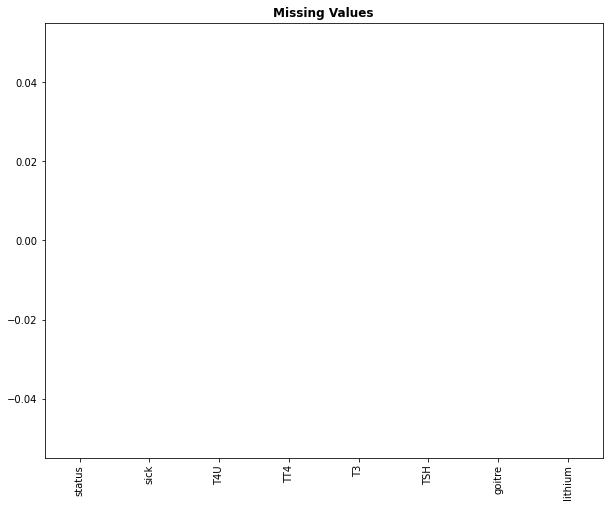

In [58]:
#Lets vizualize the missing values
plt.figure(figsize=(10,8))
hypo.isnull().sum().sort_values(ascending = False).head(8).plot(kind="bar")
plt.title("Missing Values",weight="bold")

In [56]:
# Drop TBG because it has alot of ? values 
hypo.drop('TBG', 1, inplace=True)

In [59]:
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


**Check for Outliers**

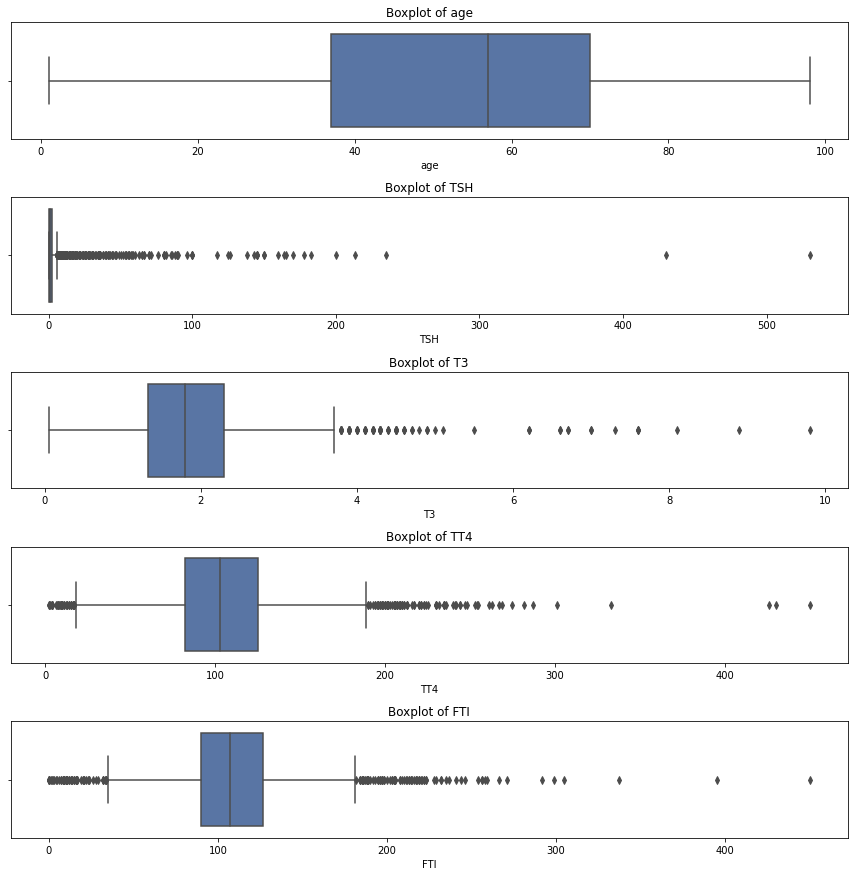

In [61]:
col = ['age','TSH','T3','TT4','FTI']

fig, ax = plt.subplots(len(col),figsize= (15,15))
sns.set(style="whitegrid")

for i, col in enumerate(hypo[col]):
  sns.boxplot(hypo[col], ax=ax[i])
  ax[i].set_title('Boxplot of {}'.format(col))

plt.subplots_adjust(hspace=0.5)


we retain the outliers because dropping them will distort our data

In [62]:
# Import the clean Dataset
hypo.to_csv("hypo_new.csv")

## 6. Exploratory Analysis

In [63]:
# Load clean Dataset
data = pd.read_csv('hypo_new.csv')

data.drop(['Unnamed: 0'], 1, inplace=True)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


### **Univarite Analysis**

In [64]:
# Categorical variables
categorical = []
for i in data.columns:
  if data[i].dtype == 'object':
    categorical.append(i)
categorical

['status', 'sex']

In [65]:
# checking the unique values in our categorical var
for i in categorical:
  if data[i].dtype == 'object':
    print(data[i].value_counts())
    print('***************************************')

negative       1845
hypothyroid     113
Name: status, dtype: int64
***************************************
F    1332
M     626
Name: sex, dtype: int64
***************************************


In [67]:
# Replace all the f and t to True and False

for i in categorical[2:]:
  data[i] = data[i].str.replace('f','False').str.replace('t','True')

Text(0.5, 1.0, 'Patients with Hypothyroid vs Not with Hypothyroid')

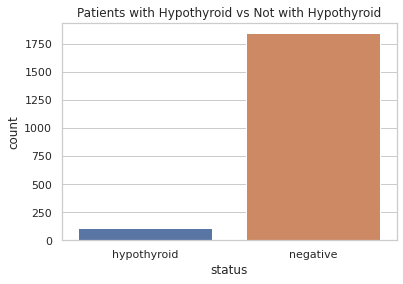

In [68]:
sns.countplot(data['status'])
plt.title('Patients with Hypothyroid vs Not with Hypothyroid')

Of all the patients tested, very few tested positve while majority tested negative.

Text(0.5, 1.0, 'Gender of patient')

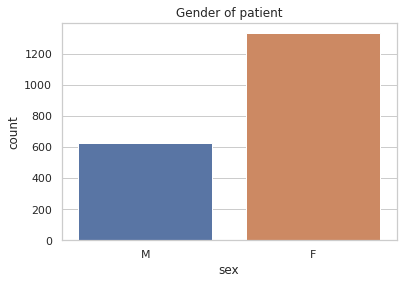

In [70]:
#gender distribution of the patients
sns.countplot(data['sex'])
plt.title("Gender of patient")

More females were tested as compared to men and hence men should be advised to go for testing.

In [72]:
data.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0


Text(0.5, 1.0, 'Patients with Goitre')

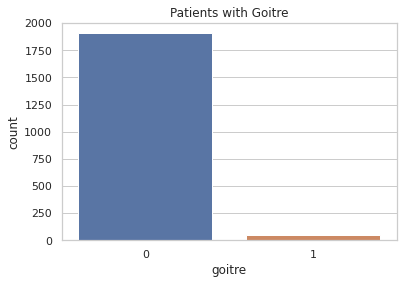

In [71]:
#patients with goitre
sns.countplot(data['goitre'])
plt.title("Patients with Goitre")


Most of the patients tested did not have goitre.

sex
F    84
M    29
Name: status, dtype: int64


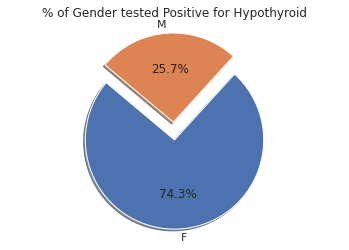

In [73]:
# Check on the percentage of gender that have tested positive for Hypothyroid
data1 = data[data["status"] == 'hypothyroid']
data1
status = data1['status'].groupby(data1['sex']).count()
print(status)
gender = [ 'F','M']
explode = (0.2, 0)

plt.pie(status, labels= gender,explode= explode, autopct= '%1.1f%%', startangle= 140,shadow = True)
plt.axis('equal')
plt.title('% of Gender tested Positive for Hypothyroid')
plt.show()

84 of the female patients tested positive accounting for 74.3% of the positive cases whereas for men 29 cases turned positive which translates to 25.7% of the positive cases.

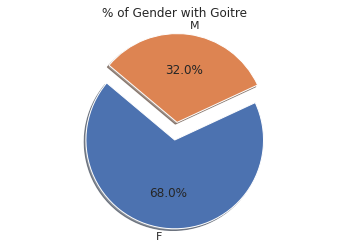

sex
F    1332
M     626
Name: goitre, dtype: int64

In [74]:
# Check on the percentage of gender with goitre
explode = (0.2, 0)

goitre = data['goitre'].groupby(data['sex']).count()
gender = ['F','M']
goitre

plt.pie(goitre, labels= gender,explode= explode, autopct= '%1.1f%%', startangle= 140,shadow = True)
plt.axis('equal')
plt.title('% of Gender with Goitre')
plt.show()
goitre


1332 of the female patients had goitre accounting for 68% of the goitre patients whereas for men, 626 had goitre which translates to 38% of the goitre patients.

Text(0.5, 1.0, 'Patients on Thyroxine')

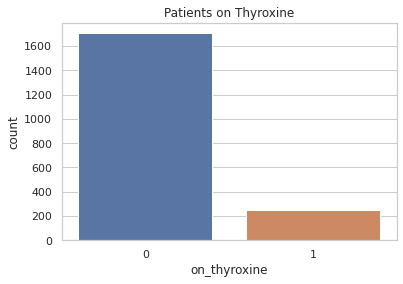

In [75]:
# Patients on Thyroxine
sns.countplot(data['on_thyroxine'])
plt.title("Patients on Thyroxine")

Most o the patients were not under thyroxine medication.

Text(0.5, 1.0, 'Patients on AntiThyroid Medication')

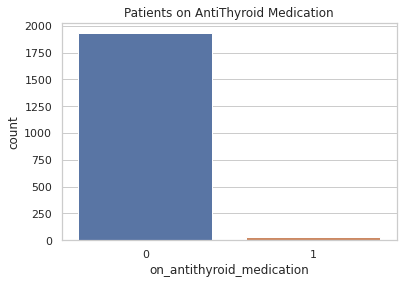

In [76]:
#Patients on AntiThyroxine
sns.countplot(data['on_antithyroid_medication'])
plt.title("Patients on AntiThyroid Medication")

very few patients were on antithyroid medication.

Text(0.5, 1.0, 'Patients had Thyroid Surgery')

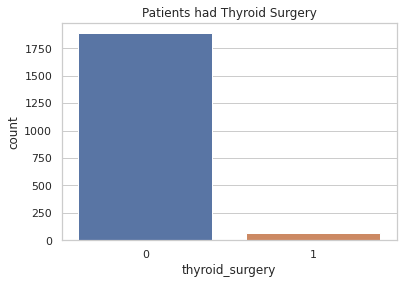

In [77]:
# Those patients that have had Thyroid Surgery
sns.countplot(data['thyroid_surgery'])
plt.title("Patients had Thyroid Surgery")

Most of the patients had not undergone thyroid surgery.

**Description**

In [78]:
#Description of the numeric data

des = data.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(data.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,53.523493,0.128703,0.010725,0.013790,0.036261,0.075077,0.070991,0.024515,0.041369,0.012768,0.001021,0.026047,5.942926,1.921195,107.294331,0.987467,110.226404
std,19.242773,0.334956,0.103032,0.116646,0.186988,0.263582,0.256875,0.154680,0.199192,0.112301,0.031952,0.159316,24.614950,0.953359,44.007499,0.230057,40.296820
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.325000,82.000000,0.850000,90.000000
50%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,2.300000,125.000000,1.070000,126.750000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,9.800000,450.000000,2.030000,450.000000
Range,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,9.750000,448.000000,2.030000,450.000000
IQR,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.975000,43.000000,0.220000,36.750000


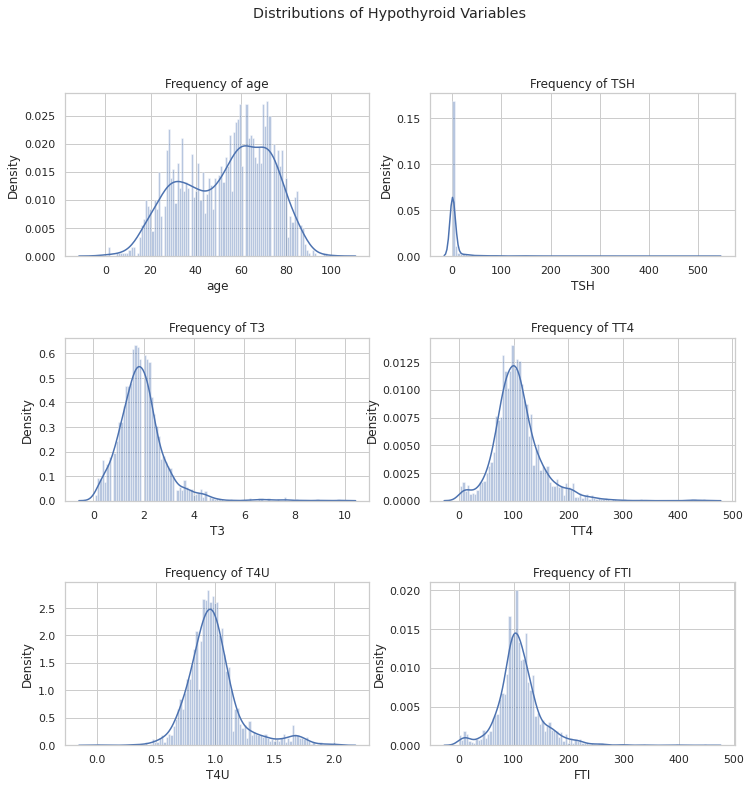

In [79]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Hypothyroid Variables')

num = data[['age','TSH','T3','TT4','T4U','FTI']]

for ax, values, name in zip(axes.flatten(), num.values.T, num.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(num.values.T[1]))//2)
    ax.set(title="Frequency of {}".format(name), xlabel=name)

### **Bivariate Analysis**

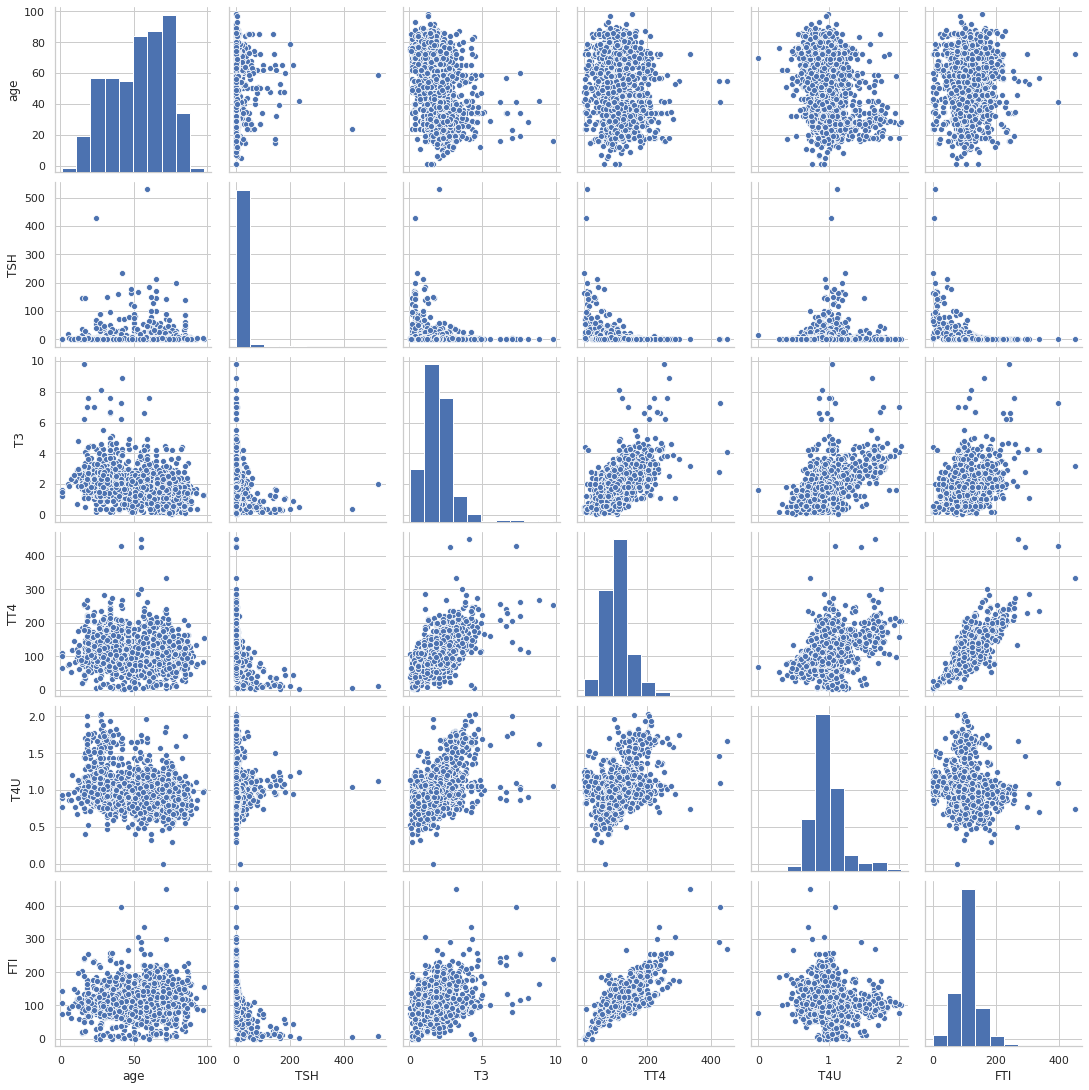

In [ ]:
# Scatter Plots of our Numeric Data
sns.pairplot(data)

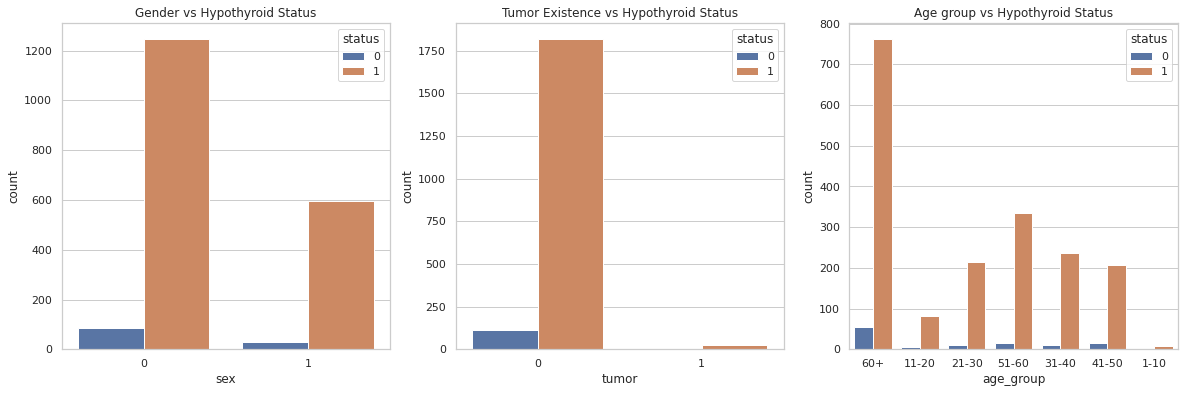

In [106]:
# comparing gender, tumor existence and age vs hypothyroid status
#creating age grroup
# creating age groups

conditions = [
    (data['age'] >= 1) & (data['age'] <= 10),
    (data['age'] >= 11) & (data['age'] <= 20),
    (data['age'] >= 21) & (data['age'] <= 30),
    (data['age'] >= 31) & (data['age'] <= 40),
    (data['age'] >= 41) & (data['age'] <= 50),
    (data['age'] >= 51) & (data['age'] <= 60),
    (data['age'] >= 61) & (data['age'] <= 100),
    ]

# create a list of the values we want to assign for each condition
values = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# create a new column and use np.select to assign values to it using our lists as arguments
data['age_group'] = np.select(conditions, values)

# display updated DataFrame
data.head()
fig,ax=plt.subplots(1,3,figsize=(20,6))

sns.countplot('sex',hue='status',data=data,ax=ax[0])
ax[0].set_title('Gender vs Hypothyroid Status')

sns.countplot('tumor',hue='status',data=data,ax=ax[1])
ax[1].set_title('Tumor Existence vs Hypothyroid Status')

sns.countplot('age_group',hue='status',data=data,ax=ax[2])
ax[2].set_title('Age group vs Hypothyroid Status')


for ax in fig.axes:
    plt.sca(ax)
    


plt.show()

people above 60 years are mostly ffected by hypothyroidism

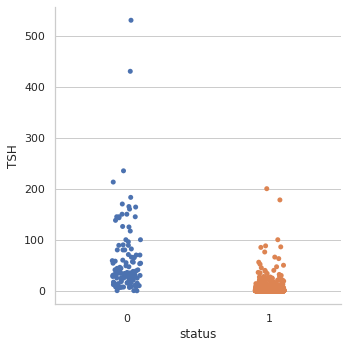

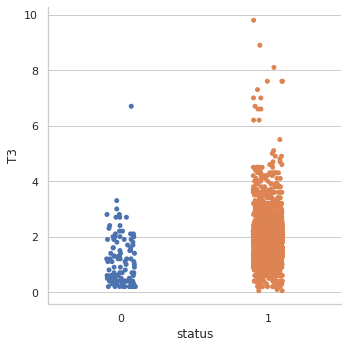

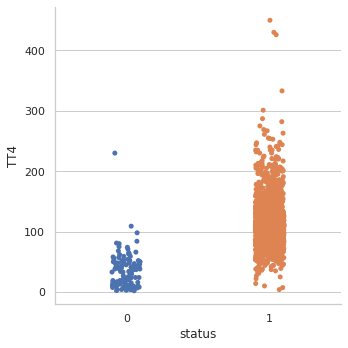

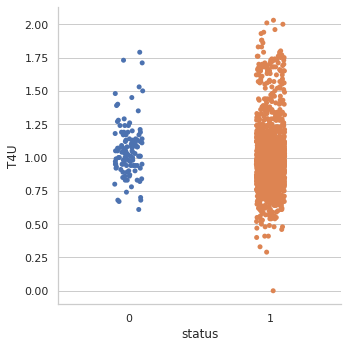

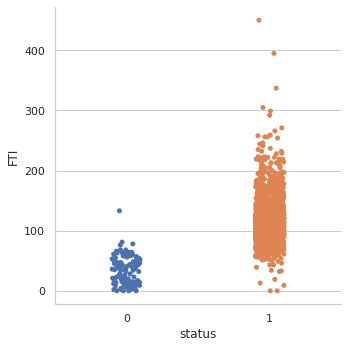

In [107]:
# comparing hypothyroid status to other numeric attributes

#sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="status", y="TSH", data=data)
sns.catplot(x="status", y="T3", data=data)
sns.catplot(x="status", y="TT4", data=data)
sns.catplot(x="status", y="T4U", data=data)
sns.catplot(x="status", y="FTI", data=data)

From the graphs above, the higher the level of TSH, the higher the likelihood of hypothyroid. On the other hand, the lower the level of FTI the higher the likelihood of hypothyroid.

In [110]:
# plotting a crosstab to compare status , gender and pregnant attributes

pd.crosstab([data.sex,data.pregnant],data.status,margins=True).style.background_gradient(cmap='Pastel1_r')

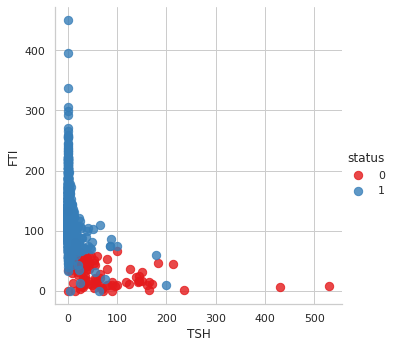

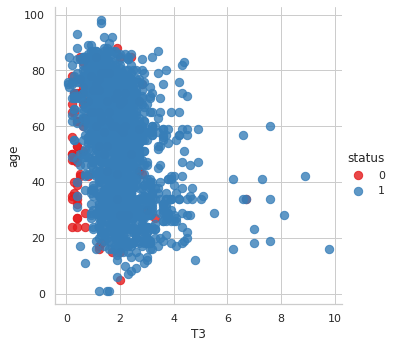

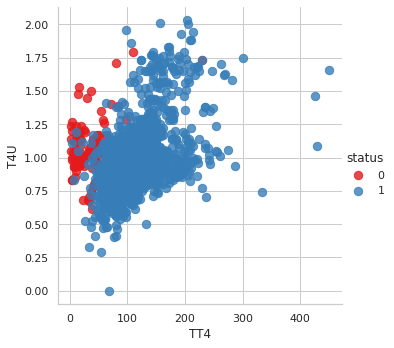

In [111]:
# Comparing numeric variables amongst each other

sns.lmplot('TSH', 'FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('T3', 'age', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('TT4', 'T4U', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [99]:
# Asses correlation between our variables 
data.corr()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
status,1.000000,-0.025142,0.033472,0.049335,0.025768,0.010484,-0.045719,-0.045847,0.025772,0.025070,0.029415,0.028145,0.007914,-0.000780,-0.568578,0.198521,0.398893,-0.077094,0.467156
age,-0.025142,1.000000,-0.001350,-0.033766,-0.009277,-0.067643,-0.024450,0.039799,-0.070788,-0.190409,0.057537,-0.066229,-0.029127,-0.068122,-0.003100,-0.339359,-0.119250,-0.242405,0.029845
sex,0.033472,-0.001350,1.000000,-0.129398,0.013672,-0.062282,-0.062680,-0.083108,-0.074371,-0.108677,0.022564,-0.019438,-0.021921,-0.084608,-0.057352,-0.094410,-0.173784,-0.246518,-0.042643
on_thyroxine,0.049335,-0.033766,-0.129398,1.000000,-0.010405,-0.019290,0.039667,0.127796,-0.070611,0.017972,-0.072182,-0.030124,-0.012290,-0.005399,-0.008029,0.046339,0.223134,0.075915,0.186521
query_on_thyroxine,0.025768,-0.009277,0.013672,-0.010405,1.000000,-0.012312,0.059372,0.007966,-0.028783,-0.016506,-0.021630,0.076483,-0.003329,0.045232,-0.022445,-0.017402,-0.002162,-0.042400,0.031414
on_antithyroid_medication,0.010484,-0.067643,-0.062282,-0.019290,-0.012312,1.000000,-0.022937,-0.033689,0.086688,0.009575,-0.024564,-0.013448,-0.003781,-0.019338,0.001273,0.085594,-0.009650,0.033292,-0.030777
thyroid_surgery,-0.045719,-0.024450,-0.062680,0.039667,0.059372,-0.022937,1.000000,0.017309,0.020847,-0.013083,-0.040295,-0.022060,-0.006203,-0.014569,0.010847,0.000846,-0.017257,0.017460,-0.022248
query_hypothyroid,-0.045847,0.039799,-0.083108,0.127796,0.007966,-0.033689,0.017309,1.000000,-0.025929,-0.007566,-0.059185,-0.032401,0.051563,-0.022255,0.053842,-0.032771,0.016243,0.022351,-0.013724
query_hyperthyroid,0.025772,-0.070788,-0.074371,-0.070611,-0.028783,0.086688,0.020847,-0.025929,1.000000,0.071921,-0.057425,-0.031437,-0.008839,0.042197,-0.032227,0.181852,0.130503,0.075936,0.104038
pregnant,0.025070,-0.190409,-0.108677,0.017972,-0.016506,0.009575,-0.013083,-0.007566,0.071921,1.000000,-0.032932,0.011388,-0.005069,0.098488,-0.014682,0.245963,0.202295,0.395051,-0.021714


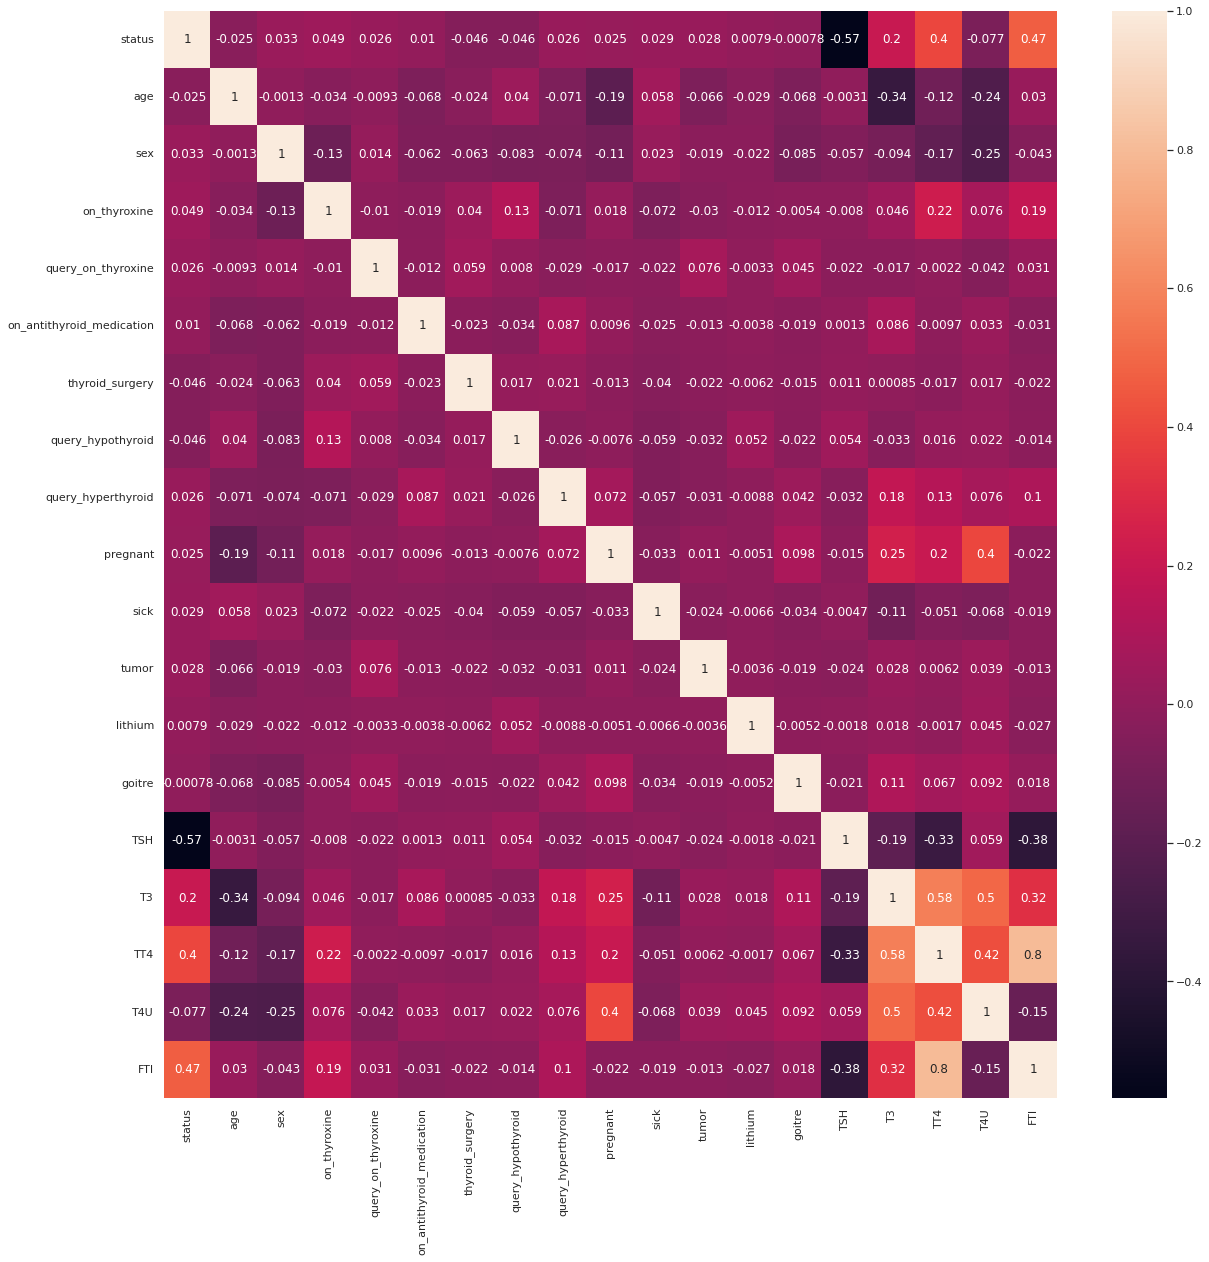

In [112]:
#correlation using heatmap
fig, heat = plt.subplots(figsize = (20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

Coefficient=1 accross the diagonal shows that a variable perfectly correlates to itself
FTI_measured and TT4_measured have coefficient of 1
FTI_measured and T4U_measured have coefficient of 1

 ### Multivariate analysis

In [101]:
# Convert the Categorical Variables into Numeric
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in categorical:
  data[i] = en.fit_transform(data[i])

In [117]:
# Encode age_group columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['age_group'] = labelencoder.fit_transform(data['age_group'])


In [118]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,age_group
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,6
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,1
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,2
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,2
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,6


**LDA**

In [113]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,age_group
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,60+
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,11-20
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,21-30
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,21-30
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,60+


In [120]:
# We will start by separating our data into independent and dependent variables
X = data.drop('status', axis =1)
y = data['status']

In [121]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [122]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-0.02753876,  0.18228227, -0.1869222 ,  0.58732662,  1.20983675,
        -1.1219058 , -0.440014  , -0.62077642,  1.42674924,  1.14852163,
         1.25376277,  3.8742178 , -0.76761812, -0.13023014,  0.13462065,
         0.04877697, -5.97758426,  0.00645622,  0.20894574]])

**Feature Importance**

In [123]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
lithium,3.874218
pregnant,1.426749
tumor,1.253763
on_antithyroid_medication,1.209837
sick,1.148522
query_on_thyroxine,0.587327
age_group,0.208946
sex,0.182282
T3,0.134621
TT4,0.048777


**Multicollinearity**

In [134]:
# Checking for multicollinearlity using VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

                      feature         VIF
0                         age  106.502277
1                         sex    1.484337
2                on_thyroxine    1.193797
3          query_on_thyroxine    1.028427
4   on_antithyroid_medication    1.035672
5             thyroid_surgery    1.046478
6           query_hypothyroid    1.116691
7          query_hyperthyroid    1.140003
8                    pregnant    1.123507
9                        sick    1.061139
10                      tumor    1.024796
11                    lithium    1.005579
12                     goitre    1.056074
13                        TSH    1.064479
14                         T3    3.389679
15                  age_group  108.096232


TT4 ,T4U , FTI, T3, age_group and age have VIF above 5

In [135]:
data.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3'], dtype='object')

In [136]:
#drop the TT4_measured,TT4 ,T4U_measured,T4U ,FTI_measured,FTI columns because they have high VIF score
data.drop(['TT4', 'T4U', 'FTI', ],1, inplace=True)

KeyError: ignored

In [137]:
# We will start by separating our data into independent and dependent variables
X = data.drop('status', axis =1)
y = data['status']

In [138]:
# Checking for multicollinearlity using VIF after dropping few columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

                      feature       VIF
0                         sex  1.347933
1                on_thyroxine  1.177380
2          query_on_thyroxine  1.023748
3   on_antithyroid_medication  1.034400
4             thyroid_surgery  1.042833
5           query_hypothyroid  1.095590
6          query_hyperthyroid  1.137508
7                    pregnant  1.094970
8                        sick  1.031466
9                       tumor  1.024599
10                    lithium  1.005314
11                     goitre  1.056068
12                        TSH  1.028852
13                         T3  1.941543


In [139]:
#drop the age and age group columns because they have high VIF score
data.drop(['age', 'age_group' ],1, inplace=True)

KeyError: ignored

In [140]:
# Checking for multicollinearlity using VIF after dropping age columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

                      feature       VIF
0                         sex  1.347933
1                on_thyroxine  1.177380
2          query_on_thyroxine  1.023748
3   on_antithyroid_medication  1.034400
4             thyroid_surgery  1.042833
5           query_hypothyroid  1.095590
6          query_hyperthyroid  1.137508
7                    pregnant  1.094970
8                        sick  1.031466
9                       tumor  1.024599
10                    lithium  1.005314
11                     goitre  1.056068
12                        TSH  1.028852
13                         T3  1.941543


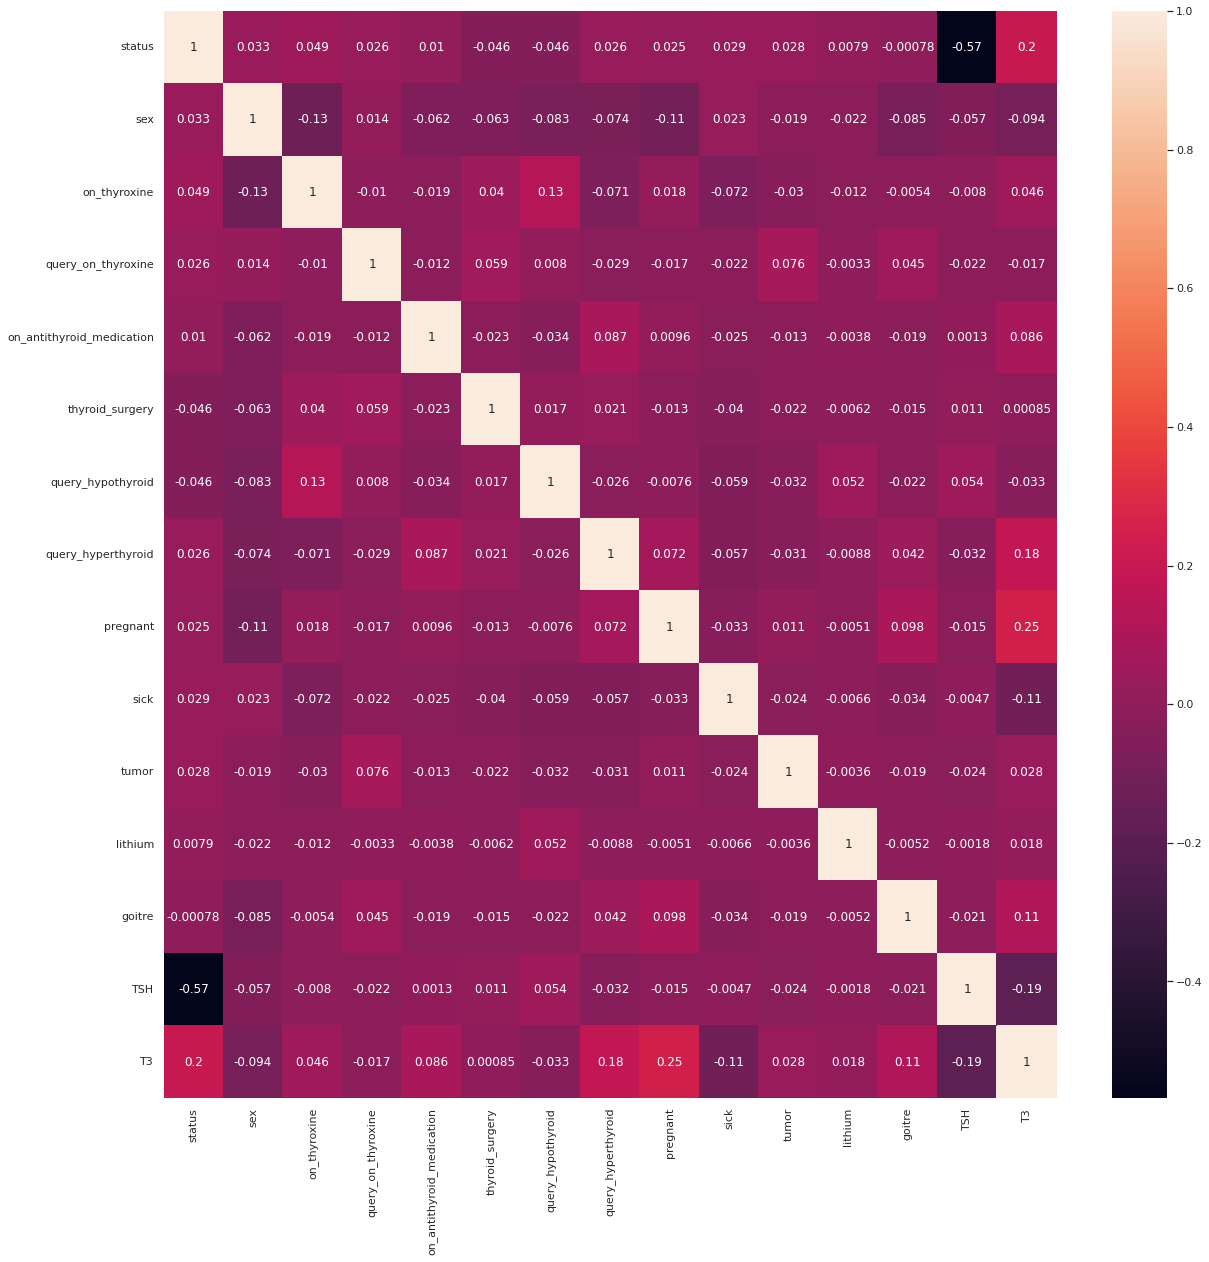

In [141]:
#correlation using heatmap after dropping columns
fig, heat = plt.subplots(figsize = (20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

**Conclusion**

From our Analysis we see most of the Patients have tested Negative for Hypothyroid.
A large amount of those tested are Females, from those who tested positive for hypothroid,the Female Patients are the highest also of the patients, females had the highest percentage of goitre

Alot of the patients did not take Thyroid, antithyroid medication or had undergone thyroid surgery

Most of our numeric data is almost normally distributed expcept for **TSH** which is **positively skewed**.
The **Status** which inicates if a patient has Hypothroid or not has moderate correlation between **TSH** and a weak correlation with **FTI,TT4 and T3** and having very low correlation with the other variables

The Variable **Pregnant** shows low correlation but its above 0.1 between **TT4,T3,T4U**

The Variables **FTI** and **TT4** have a very strong correlation 

## 7. Implementing the Solution

In [142]:
# Libraries to Implement the Solution
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn import metrics


## Part1: Decision Trees

### Random Forest

In [ ]:
!pip install six

In [184]:
#splitting data into features and target
X=data.drop(["status"],1)
y=data[["status"]].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
y_pred = forest.predict(X_test)
print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))
print("The accuracy of  random forest classifier is: ", accuracy_score(y_test,y_pred)*100)

Confussion Matrix : 
 [[ 21   7]
 [  6 358]]
The accuracy of  random forest classifier is:  96.68367346938776


The accuracy of the RFC is 96.683% which is acceptable.

From the classification matrix 21, 584 were predicted correctly and 6,7 were not predicted correctly. hyperparameter tuning is required so as tot fit the model with the best parameters so that we can check the accuracy

In [185]:
#choosing our best parameters using Randomised search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

search = RandomizedSearchCV(estimator= forest, param_distributions={'n_estimators': sp_randint(100,1000), 'min_samples_split': np.arange(2,20), 'max_depth': sp_randint(2,10)},
                      n_jobs=1, cv = 5)

search.fit(X_train, y_train)
search.best_params_

{'max_depth': 7, 'min_samples_split': 15, 'n_estimators': 583}

In [186]:
# fit model with the best parameters

forest = RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=720, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))
print('accuracy = ', accuracy_score(y_test, y_pred)* 100)

Confussion Matrix : 
 [[ 20   8]
 [  5 359]]
accuracy =  96.68367346938776


The tuned model perfomed similar to the base model.

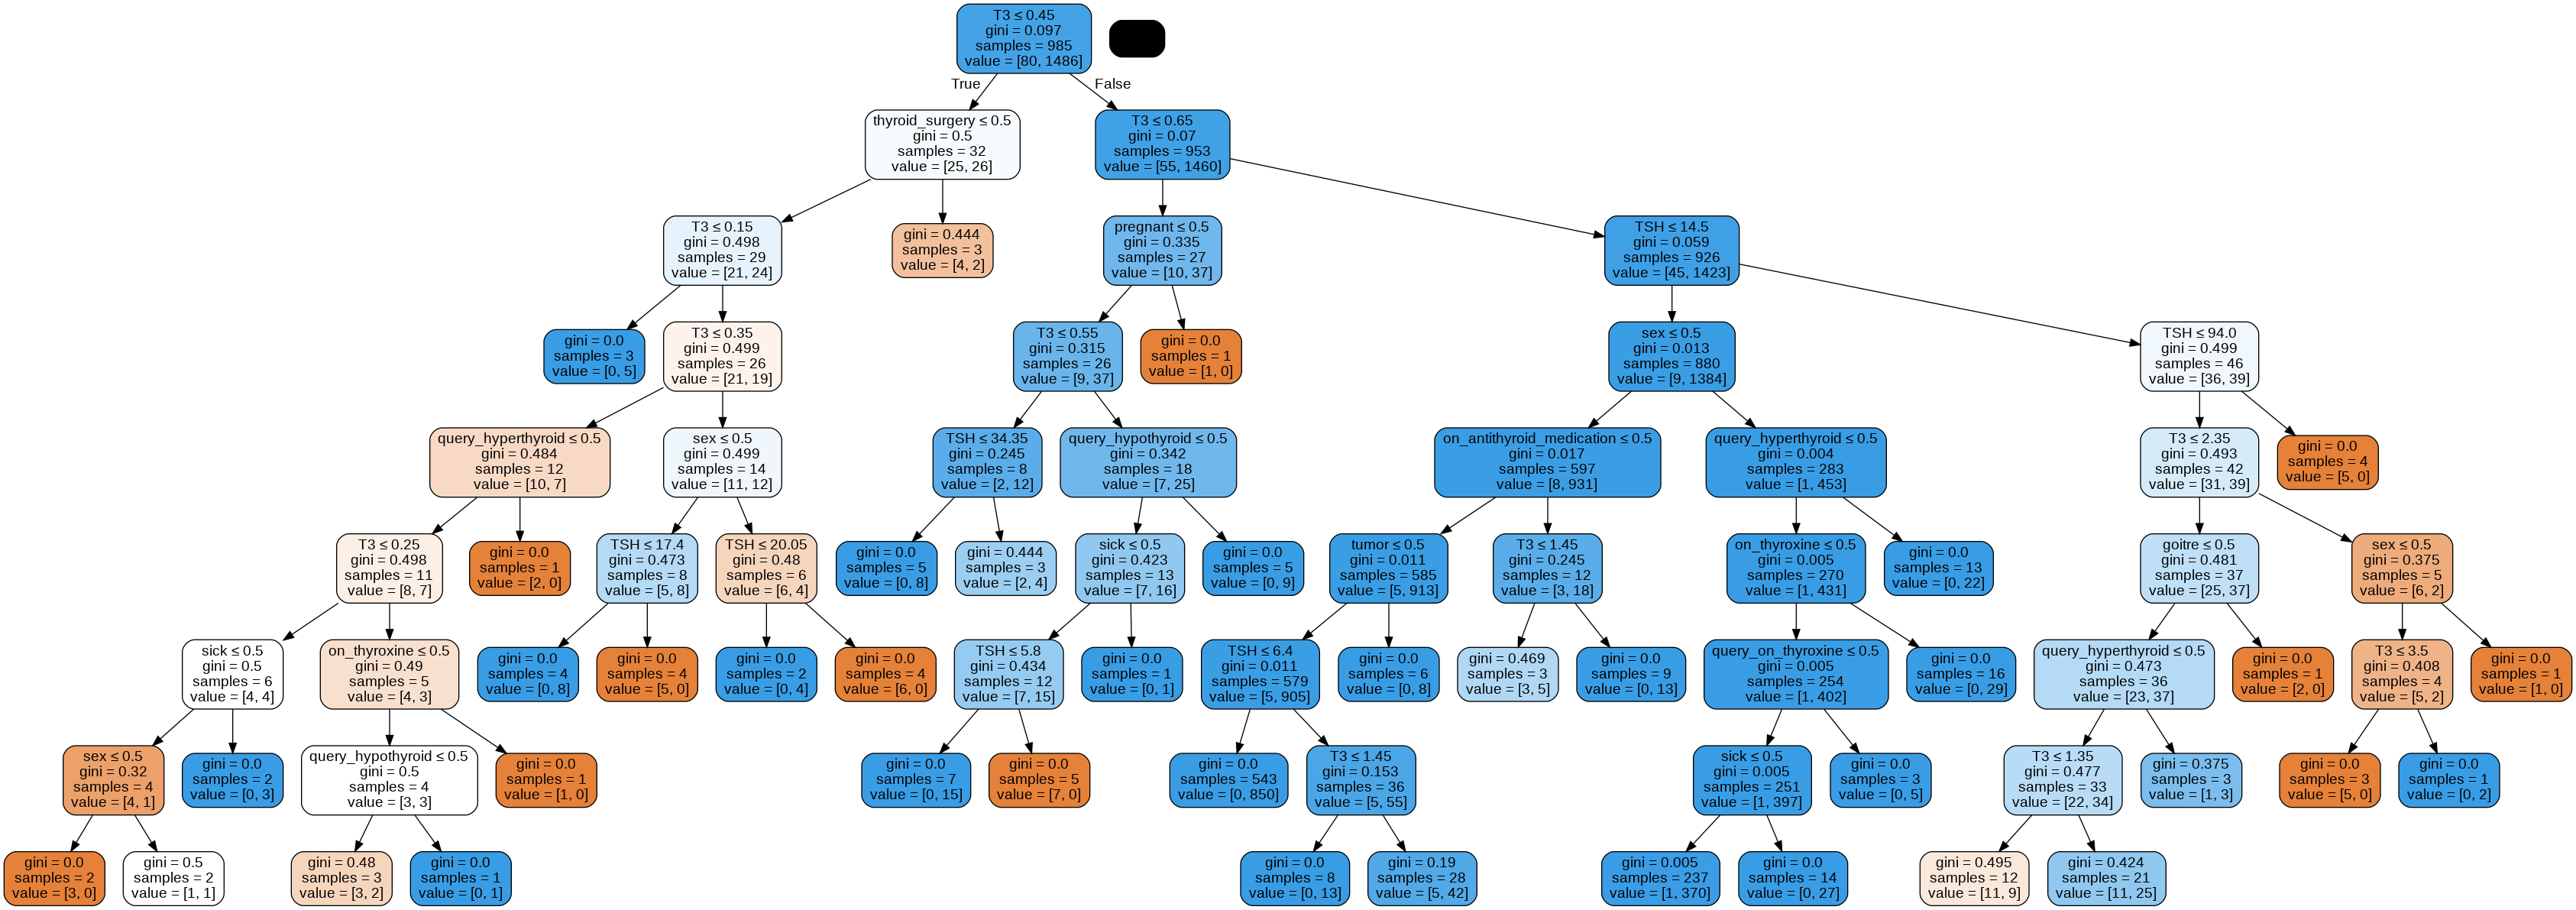

In [187]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())



### Ada boosted trees

In [188]:
from sklearn.ensemble import AdaBoostClassifier
#Building our adaboost model
ada_boost = AdaBoostClassifier()

# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)
#making predictions using our model
y_pred_ada = ada_boost.predict(X_test)
#checking the accuracy of our model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_ada))

Accuracy: 96.93877551020408
Confusion matrix  
 [[ 23   5]
 [  7 357]]


The accuracy of the model is 96.938%

From the confusion matrix, we can see that (23, 357) were predicted correcly and (7, 5) were not predicted correctly

In [189]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100,200,300]}
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 5, n_jobs = 1)
#Fitting the grid to the training data
grid_object.fit(X_train, y_train)
#Extracting the best parameters
print(grid_object.best_params_)

{'n_estimators': 100}


In [190]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100,200,300]}
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 5, n_jobs = 1)
#Fitting the grid to the training data
grid_object.fit(X_train, y_train)
#Extracting the best parameters
print(grid_object.best_params_)

{'n_estimators': 100}


Feature Importance

In [191]:
# identify the important featues
feature_imp = pd.Series(ada_boost.feature_importances_,\
                        index=X.columns).sort_values(ascending=False)
print('important features \n',feature_imp)

important features 
 TSH                          0.64
T3                           0.24
on_thyroxine                 0.04
sick                         0.04
sex                          0.02
goitre                       0.02
query_on_thyroxine           0.00
on_antithyroid_medication    0.00
thyroid_surgery              0.00
query_hypothyroid            0.00
query_hyperthyroid           0.00
pregnant                     0.00
tumor                        0.00
lithium                      0.00
dtype: float64


Text(0, 0.5, 'Importance')

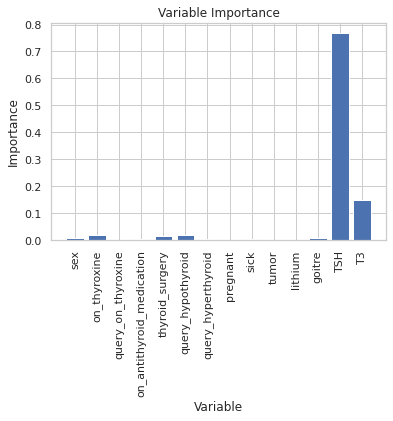

In [147]:
# Visualize
xlabels = list(range(len(importance)))

plt.bar(xlabels, importance, orientation = 'vertical')
plt.xticks(xlabels, features, rotation =90)
plt.title("Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Importance")

In [175]:
!pip install six

### Gradient Boosting

**Fit Model and Make Prediction**

In [148]:
no_of_trees = 100
clf_gb = GradientBoostingClassifier(learning_rate= 0.3, n_estimators=no_of_trees, min_samples_split=3,max_depth=10)
clf_gb.fit(X_train,y_train)

gb_pred = clf_gb.predict(X_test)

**Evaluate the Model**

RMSE is: 0.23145502494313785
Accuracy is: 0.9464285714285714
[[ 15  11]
 [ 10 356]]


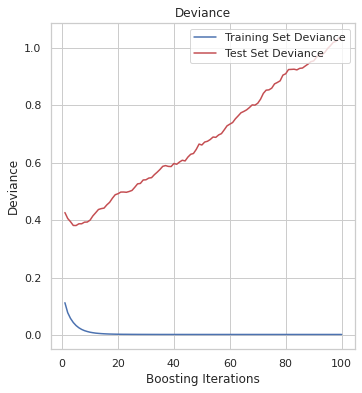

In [149]:
print("RMSE is:",np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))
print("Accuracy is:", accuracy_score(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')

plt.plot(np.arange(no_of_trees) + 1, clf_gb.train_score_, 'b-',
        label='Training Set Deviance')


test_score = np.zeros((no_of_trees), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(clf_gb.staged_decision_function(X_test)):
    test_score[i] = clf_gb.loss_(y_test, y_pred)

plt.plot(np.arange(no_of_trees) + 1, test_score, 'r-',
        label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


**Feature Importance**

Text(0, 0.5, 'Importance')

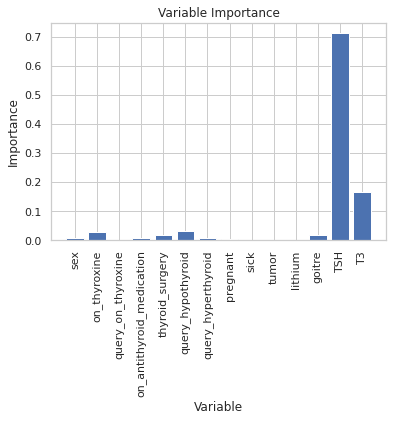

In [150]:
importance2 = list(clf_gb.feature_importances_)

# Visualize
xlabels = list(range(len(importance2)))

plt.bar(xlabels, importance2, orientation = 'vertical')
plt.xticks(xlabels, features, rotation =90)
plt.title("Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Importance")

## SVM

In [151]:
data.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3
0,0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6
1,0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4
4,0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2


In [153]:
data.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3'], dtype='object')

In [154]:
thyroid = data[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3']]
y = data['status']

In [155]:
#Use PCA to reduce the features to 2 so that we can plot in a 2-D plane
pca = PCA(n_components=2)
X = pca.fit_transform(thyroid)
X.shape

(1958, 2)

In [156]:
#Split the data into train and test
S_train,S_test,t_train,t_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Linear SVM 

In [157]:
lin_svc = SVC(kernel='linear')
clf_model = lin_svc.fit(S_train,t_train)

Visualize

In [158]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


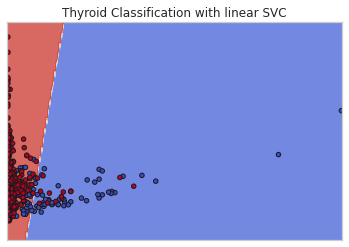

In [159]:
fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate Model**

In [160]:
ln_pred = clf_model.predict(S_test)

print("Accuracy is:", accuracy_score(t_test,ln_pred))
print(confusion_matrix(t_test,ln_pred))


Accuracy is: 0.9566326530612245
[[ 13  15]
 [  2 362]]


### Polynomial SVC

In [161]:
%%time
poly_scv = SVC(kernel = 'poly', degree=2, gamma='auto')
poly_model = poly_scv.fit(S_train,t_train)

CPU times: user 1min 12s, sys: 469 µs, total: 1min 12s
Wall time: 1min 12s


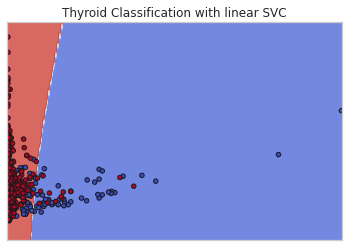

In [162]:
# Visualize the Classification

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, poly_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate the Model**

In [163]:
pl_pred = poly_scv.predict(S_test)

print("The Accuracy is:",accuracy_score(t_test,pl_pred))
print(confusion_matrix(t_test,pl_pred))

The Accuracy is: 0.9591836734693877
[[ 14  14]
 [  2 362]]


### Radial Basis Function SVC

In [164]:
%%time

rbf_svc = SVC(kernel = 'rbf', gamma=2**3, C = 2**5)
rbf_model = rbf_svc.fit(S_train, t_train)

CPU times: user 73.6 ms, sys: 0 ns, total: 73.6 ms
Wall time: 74.2 ms


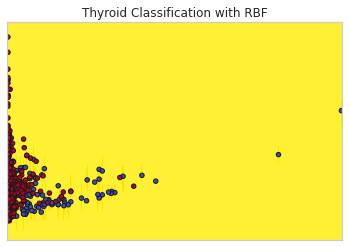

In [165]:
# Visualize the Classification

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with RBF')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, rbf_model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate the Model**

In [166]:
rbf_pred = rbf_svc.predict(S_test)


print("The Accuracy is:",accuracy_score(t_test,rbf_pred))
print(confusion_matrix(t_test,rbf_pred))

The Accuracy is: 0.9183673469387755
[[  4  24]
 [  8 356]]


### Sigmoid SVC

In [167]:
sig_svc = SVC(kernel= 'sigmoid')
sig_model = sig_svc.fit(S_train,t_train)


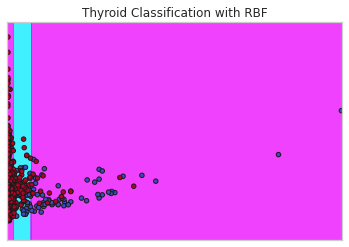

In [168]:
# Visualize 

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sig_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with RBF')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, sig_model, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate the Model**

In [169]:
sig_pred = sig_svc.predict(S_test)


print("The Accuracy is:",accuracy_score(t_test,sig_pred))
print(confusion_matrix(t_test,sig_pred))

The Accuracy is: 0.9158163265306123
[[ 12  16]
 [ 17 347]]


### Linear SVC model

In [170]:
# Features and Labels
X = data.drop('status',1)
y = data['status']

S_train,S_test,t_train,t_test = train_test_split(X,y, test_size=.2, random_state=0)

**Fit the Model and Make Prediction**

In [171]:
lin = SVC(kernel='linear')
clf_lin = lin.fit(S_train,t_train)

ln_pred = lin.predict(S_test)

**Evaluate the Model**

In [172]:
# since we are using all features 
print("The Accuracy:",accuracy_score(t_test,ln_pred))
print(confusion_matrix(t_test,ln_pred))

The Accuracy: 0.9591836734693877
[[ 15  13]
 [  3 361]]


## 8. Challenging the solution

From our Analysis our Decision Trees, b**Random Forest** had an accuracy of **96.683%**, **ADA boosted** had **96.938%**, **Gradient Boosting** gave an accuracy of **94.64%.** Which as per our metric of success it can correctly claasifiers a patients who has thyroid and the one who hasn't



For the Support Vector Machine, the Linear SVC had the highest accuracy, with an **accuracy of 95.66%**

The **Polynomial SVC** had an accuracy of **95.91%**

The **Radial Basis Function SVC** achieved **91.83% accuracy**

The **Sigmoid Classifier** had the worst score in accuracy of **91.58 %**.As per the metric of success the Polynomial SVC and the Linear SVC could be used for thryoid classifiation in patients.

With **Linear SVC** having the best accuracy, all the features were included and the accuracy increased to **95.91%**

Compared to the Decision Trees, both Random Forest and Gradient Boosting have the highest accuracy, therefore the Decision Trees are best suited  for this classification

## Follow up questions


## a) Did we have the right question?

Yes, the research question was clear and specific enough.

## b) Did we have the right data?

Yes, although the feature description was not available. It is important to know exactly what an attribute represents in order to determine it's relevance to the research question.

## c) Do we need other data to answer the research question?

The data was sufficient enough.